<a href="https://colab.research.google.com/github/gutembergue-martins/awesome-chatgpt-prompts/blob/main/Transfer_Learning_DIO_BootCamp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [50]:
!pip install Pillow

In [51]:
import os
import zipfile
import random
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from shutil import copyfile
from PIL import Image



In [20]:
# Corrigindo o comando wget
!wget --no-check-certificate "https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip" -O /tmp/cats-and-dogs.zip

# Extraindo o conteúdo do arquivo ZIP
local_zip = '/tmp/cats-and-dogs.zip'
try:
    with zipfile.ZipFile(local_zip, 'r') as zip_ref:
        zip_ref.extractall('/tmp')
    print("Extração concluída com sucesso.")
except FileNotFoundError:
    print(f"Arquivo não encontrado: {local_zip}")
except zipfile.BadZipFile:
    print("Erro: O arquivo ZIP está corrompido.")


--2025-01-23 20:39:41--  https://download.microsoft.com/download/3/E/1/3E1C3F21-ECDB-4869-8368-6DEBA77B919F/kagglecatsanddogs_5340.zip
Resolving download.microsoft.com (download.microsoft.com)... 23.35.190.19, 2600:1408:c400:138e::317f, 2600:1408:c400:1389::317f
Connecting to download.microsoft.com (download.microsoft.com)|23.35.190.19|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 824887076 (787M) [application/octet-stream]
Saving to: ‘/tmp/cats-and-dogs.zip’

/tmp/cats-and-dogs. 100%[===================>] 786.67M  37.4MB/s    in 26s     

2025-01-23 20:40:07 (30.3 MB/s) - ‘/tmp/cats-and-dogs.zip’ saved [824887076/824887076]

Extração concluída com sucesso.


In [60]:
print(len(os.listdir('/tmp/PetImages/Cat')))
print(len(os.listdir('/tmp/PetImages/Dog')))

# Garantir que os diretórios existam
os.makedirs('/tmp/cats-v-dogs/TEST_DIR', exist_ok=True)
os.makedirs('/tmp/cats-v-dogs/training/cats', exist_ok=True)
os.makedirs('/tmp/cats-v-dogs/training/dogs', exist_ok=True)
os.makedirs('/tmp/cats-v-dogs/testing/cats', exist_ok=True)
os.makedirs('/tmp/cats-v-dogs/testing/dogs', exist_ok=True)

print("Diretórios criados ou já existentes.")



12501
12501
Diretórios criados ou já existentes.


In [23]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
  files = []
  for filename in os.listdir(SOURCE):
    file = SOURCE + filename
    if os.path.getsize(file)>0:
      files.append(filename)
    else:
      print(filename + "is zero length, so ignoring")

In [61]:
def split_data(SOURCE, TRAINING, TESTING, SPLIT_SIZE):
    """
    Divide os arquivos em diretórios de treinamento e teste.
    """
    # Lista de arquivos no diretório fonte
    files = [f for f in os.listdir(SOURCE) if os.path.isfile(os.path.join(SOURCE, f))]

    if not files:
        print(f"Nenhum arquivo encontrado no diretório: {SOURCE}")
        return

    # Embaralhar arquivos e dividir
    shuffled_set = random.sample(files, len(files))
    training_length = int(len(files) * SPLIT_SIZE)
    training_set = shuffled_set[:training_length]
    testing_set = shuffled_set[training_length:]

    # Criar diretórios se não existirem
    os.makedirs(TRAINING, exist_ok=True)
    os.makedirs(TESTING, exist_ok=True)

    # Copiar arquivos para os diretórios correspondentes
    for filename in training_set:
        copyfile(os.path.join(SOURCE, filename), os.path.join(TRAINING, filename))

    for filename in testing_set:
        copyfile(os.path.join(SOURCE, filename), os.path.join(TESTING, filename))

    print(f"Concluído para {SOURCE}: {len(training_set)} treinamento, {len(testing_set)} teste.")

# Diretórios fonte e destino
TEST_DIR = '/tmp/cats-v-dogs/testing'
CAT_SOURCE_DIR = '/tmp/PetImages/Cat/'
DOG_SOURCE_DIR = '/tmp/PetImages/Dog/'
TRAINING_CATS_DIR = '/tmp/cats-v-dogs/training/cats/'
TESTING_CATS_DIR = '/tmp/cats-v-dogs/testing/cats/'
TRAINING_DOGS_DIR = '/tmp/cats-v-dogs/training/dogs/'
TESTING_DOGS_DIR = '/tmp/cats-v-dogs/testing/dogs/'

# Divisão dos dados
split_size = 0.9
split_data(CAT_SOURCE_DIR, TRAINING_CATS_DIR, TESTING_CATS_DIR, split_size)
split_data(DOG_SOURCE_DIR, TRAINING_DOGS_DIR, TESTING_DOGS_DIR, split_size)

Concluído para /tmp/PetImages/Cat/: 11250 treinamento, 1251 teste.
Concluído para /tmp/PetImages/Dog/: 11250 treinamento, 1251 teste.


In [52]:
def remove_invalid_images(directory):
    for filename in os.listdir(directory):
        file_path = os.path.join(directory, filename)
        try:
            with Image.open(file_path) as img:
                img.verify()  # Verifica se é uma imagem válida
        except (IOError, SyntaxError):
            print(f"Removendo arquivo inválido: {file_path}")
            os.remove(file_path)

# Aplicar a verificação para os diretórios de treinamento e validação
remove_invalid_images('/tmp/cats-v-dogs/training/cats')
remove_invalid_images('/tmp/cats-v-dogs/training/dogs')
remove_invalid_images('/tmp/cats-v-dogs/testing/cats')
remove_invalid_images('/tmp/cats-v-dogs/testing/dogs')

Removendo arquivo inválido: /tmp/cats-v-dogs/training/cats/666.jpg
Removendo arquivo inválido: /tmp/cats-v-dogs/training/cats/Thumbs.db
Removendo arquivo inválido: /tmp/cats-v-dogs/training/dogs/11702.jpg
Removendo arquivo inválido: /tmp/cats-v-dogs/training/dogs/Thumbs.db


/usr/local/lib/python3.11/dist-packages/PIL/TiffImagePlugin.py:949: UserWarning: Truncated File Read
  warnings.warn(str(msg))


In [53]:
print(len(os.listdir('/tmp/cats-v-dogs/training/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/training/dogs/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/cats/')))
print(len(os.listdir('/tmp/cats-v-dogs/testing/dogs/')))


12445
11248
5337
1251


In [54]:
# Configurando o ImageDataGenerator para treinamento e validação
train_datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalizar os valores dos pixels para [0, 1]
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

validation_datagen = ImageDataGenerator(rescale=1.0/255)

# Caminhos para os diretórios de treinamento e validação
TRAINING_DIR = '/tmp/cats-v-dogs/training'
VALIDATION_DIR = '/tmp/cats-v-dogs/testing'

# Gerando os dados de treinamento
train_generator = train_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'  # Classificação binária
)

# Gerando os dados de validação
validation_generator = validation_datagen.flow_from_directory(
    VALIDATION_DIR,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 23693 images belonging to 2 classes.
Found 6588 images belonging to 2 classes.


In [55]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPool2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')  # Corrigido aqui
])

model.compile(optimizer=RMSprop(learning_rate=0.001), loss='binary_crossentropy', metrics=['acc'])  # Corrigido 'br' para 'learning_rate'

history = model.fit(
    train_generator,
    epochs=15,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator)
)



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 762s 1s/step - acc: 0.5679 - loss: 0.7201 - val_acc: 0.4077 - val_loss: 1.0686
Epoch 2/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 59us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 3/15


/usr/lib/python3.11/contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


741/741 ━━━━━━━━━━━━━━━━━━━━ 824s 1s/step - acc: 0.6834 - loss: 0.5958 - val_acc: 0.8106 - val_loss: 0.4554
Epoch 4/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 54us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 5/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 787s 1s/step - acc: 0.7123 - loss: 0.5575 - val_acc: 0.7430 - val_loss: 0.5285
Epoch 6/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 36s 49ms/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 7/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 803s 1s/step - acc: 0.7335 - loss: 0.5355 - val_acc: 0.8303 - val_loss: 0.3987
Epoch 8/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 40us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 9/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 799s 1000ms/step - acc: 0.7468 - loss: 0.5090 - val_acc: 0.8142 - val_loss: 0.4198
Epoch 10/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 61us/step - acc: 0.0000e+00 - loss: 0.0000e+00
Epoch 11/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 748s 1s/step - acc: 0.7635 - loss: 0.4994 - val_acc: 0.7215 - val_loss: 0.6059
Epoch 12/15
741/741 ━━━━━━━━━━━━━━━━━━━━ 0s 44us/

In [57]:
print(f"len(epochs): {len(epochs)}")
print(f"len(acc): {len(acc)}")
print(f"len(val_acc): {len(val_acc)}")
print(f"len(loss): {len(loss)}")
print(f"len(val_loss): {len(val_loss)}")


len(epochs): 15
len(acc): 15
len(val_acc): 8
len(loss): 15
len(val_loss): 8


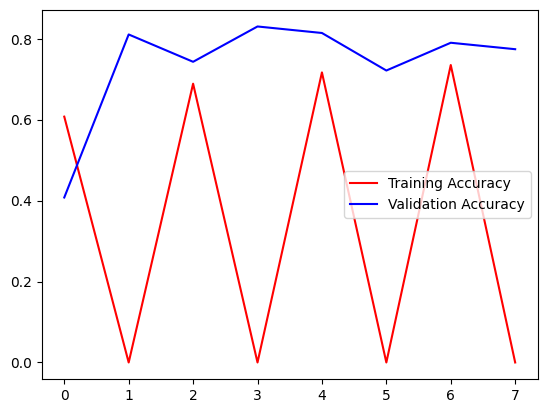

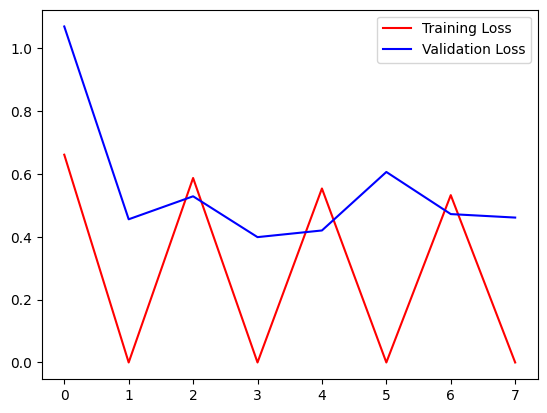

In [58]:
%matplotlib inline

import matplotlib.image as mpimg
import matplotlib.pyplot as plt

# Determinar o menor comprimento comum
min_length = min(len(acc), len(val_acc))

# Ajustar as listas para o menor comprimento
epochs = epochs[:min_length]
acc = acc[:min_length]
val_acc = val_acc[:min_length]
loss = loss[:min_length]
val_loss = val_loss[:min_length]

# Plotar gráficos ajustados
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.legend()
plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.legend()
plt.show()


In [63]:
# Definindo o diretório de teste
TEST_DIR = '/tmp/cats-v-dogs/testing'

# Criando o ImageDataGenerator para normalizar as imagens
test_datagen = ImageDataGenerator(rescale=1./255)

# Criando o gerador de dados para teste
test_generator = test_datagen.flow_from_directory(
    TEST_DIR,
    target_size=(150, 150),  # Tamanho da imagem que o modelo espera
    batch_size=20,
    class_mode='binary'  # Como é um problema binário (gato ou cachorro)
)

# Agora você pode usar o test_generator na função evaluate
test_loss, test_acc = model.evaluate(test_generator)
print(f"Test Accuracy: {test_acc:.2f}")



Found 8428 images belonging to 2 classes.
  1/422 ━━━━━━━━━━━━━━━━━━━━ 1:47 255ms/step - acc: 0.7000 - loss: 0.4580

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


422/422 ━━━━━━━━━━━━━━━━━━━━ 61s 145ms/step - acc: 0.7897 - loss: 0.4394
Test Accuracy: 0.79
